In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [59]:
# Load the data into a pandas DataFrame
airport_data = pd.read_csv('../../data/processed/air_cleaned.csv')
chakala_data= pd.read_csv('../../data/processed/vile_cleaned.csv')
kurla_data= pd.read_csv('../../data/processed/kur_cleaned.csv')

In [60]:
# Convert the 'Date' column to a datetime object
airport_data['From Date'] = pd.to_datetime(airport_data['From Date'])
chakala_data['From Date'] = pd.to_datetime(chakala_data['From Date'])
kurla_data['From Date'] = pd.to_datetime(kurla_data['From Date'])

In [61]:

# Extract the month, season, and hour from the 'Date' column
airport_data['Month'] = airport_data['From Date'].dt.month
airport_data['Season'] = (airport_data['Month'] % 12 + 3) // 3
airport_data['Hour'] = airport_data['HOUR']
airport_data['Week'] = airport_data['From Date'].dt.dayofweek


# Extract the month, season, and hour from the 'Date' column
chakala_data['Month'] = chakala_data['From Date'].dt.month
chakala_data['Season'] = (chakala_data['Month'] % 12 + 3) // 3
chakala_data['Hour'] = chakala_data['HOUR']

# Extract the month, season, and hour from the 'Date' column
kurla_data['Month'] = kurla_data['From Date'].dt.month
kurla_data['Season'] = (kurla_data['Month'] % 12 + 3) // 3
kurla_data['Hour'] = kurla_data['HOUR']


In [62]:
#show 2 to 4 columns
airport_data.head()

,From Date,AT,RH,HOUR,MONTH,THI,Month,Season,Hour,Week
0,2019-06-01 00:00:00,28.115254,87.044407,0,6,26.325406,6,3,0,5
1,2019-06-01 01:00:00,28.060427,87.195983,1,6,26.298540,6,3,1,5
2,2019-06-01 02:00:00,27.931864,87.464322,2,6,26.223018,6,3,2,5
3,2019-06-01 03:00:00,27.758462,87.938974,3,6,26.135233,6,3,3,5
4,2019-06-01 04:00:00,27.710000,87.868729,4,6,26.083197,6,3,4,5


In [63]:
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month = airport_data.groupby('Month').mean()
grouped_season = airport_data.groupby('Season').mean()
grouped_hour = airport_data.groupby('Hour').mean()
grouped_week = airport_data.groupby('Week').mean()
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month1 = chakala_data.groupby('Month').mean()
grouped_season1 = chakala_data.groupby('Season').mean()
grouped_hour1 = chakala_data.groupby('Hour').mean()
# Group the data by month, season, and hour and calculate the mean concentration of each pollutant
grouped_month2 = kurla_data.groupby('Month').mean()
grouped_season2 = kurla_data.groupby('Season').mean()
grouped_hour2 = kurla_data.groupby('Hour').mean()

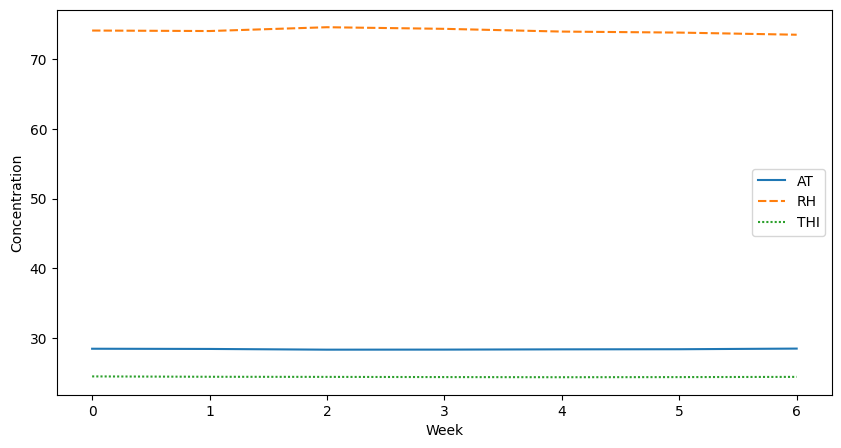

In [64]:
# Plot the mean concentration of each pollutant by month, season, and hour
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_week[['AT','RH','THI']])
plt.xlabel('Week')
plt.ylabel('Concentration')
plt.show()

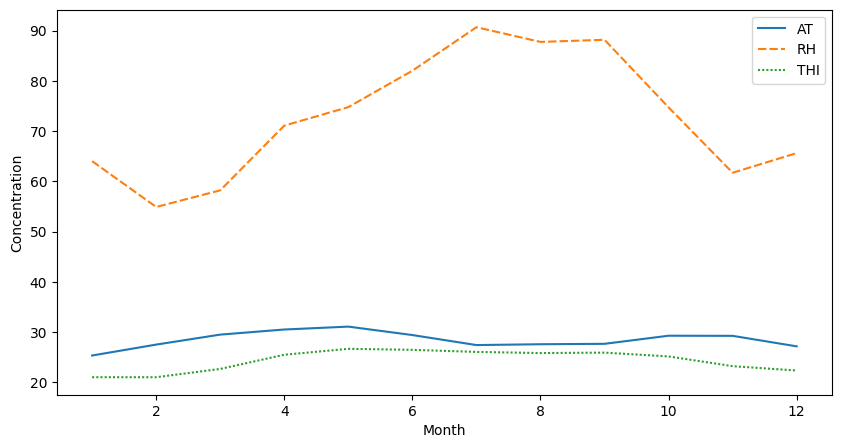

In [65]:
# Plot the mean concentration of each pollutant by month, season, and hour
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_month[['AT','RH','THI']])
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.show()


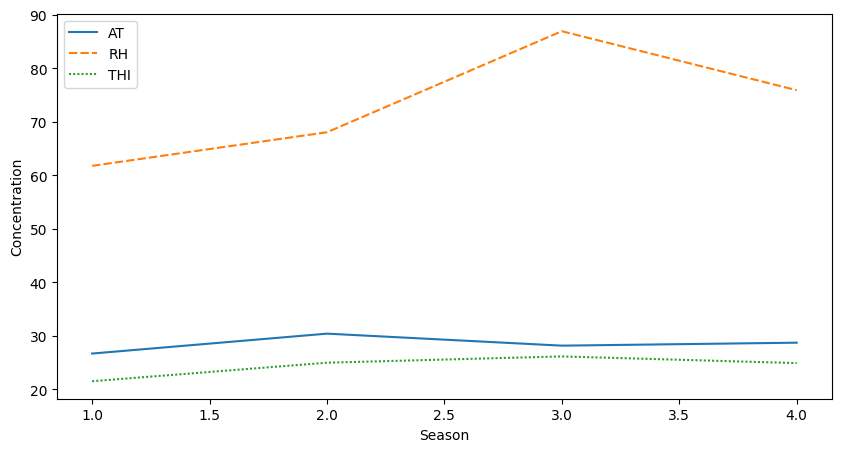

In [66]:
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_season[['AT','RH','THI']])
plt.xlabel('Season')
plt.ylabel('Concentration')
plt.show()


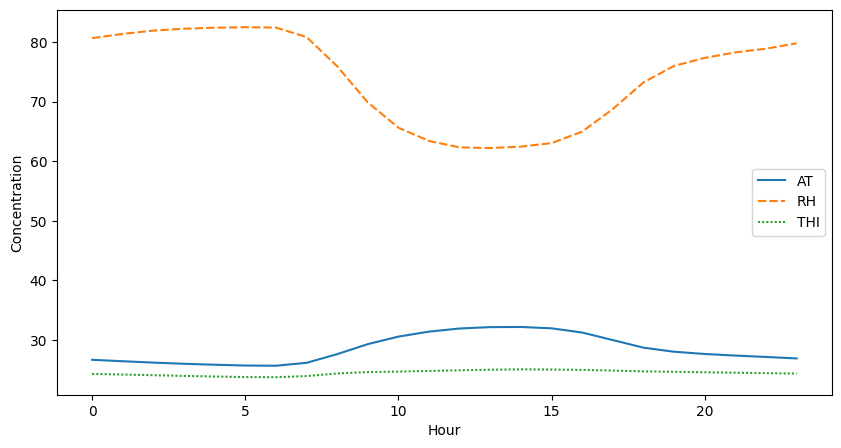

In [67]:
plt.figure(figsize=(10,5))
sns.lineplot(data=grouped_hour[['AT','RH','THI']])
plt.xlabel('Hour')
plt.ylabel('Concentration')
plt.show()

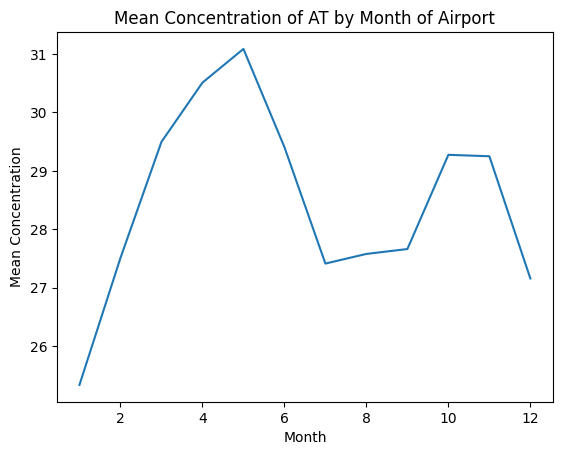

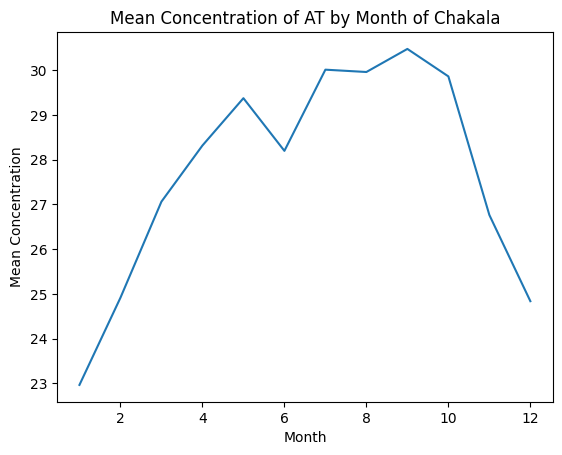

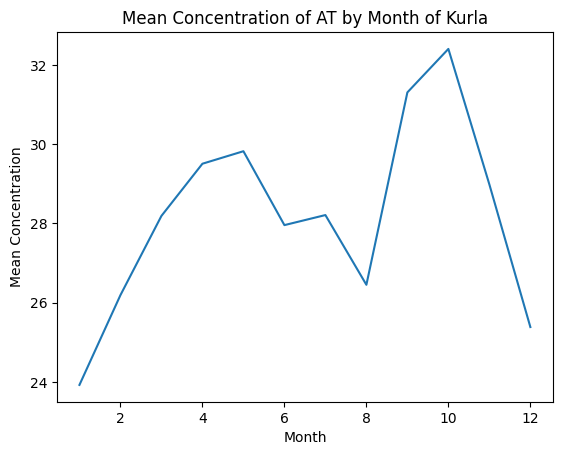

In [68]:
# Select a single pollutant
pollutant = 'AT'

# Extract the month and concentration for the selected pollutant
df_pollutant = airport_data.loc[:, ['From Date', pollutant]]
df_pollutant['month'] = df_pollutant['From Date'].dt.month
# Extract the month and concentration for the selected pollutant
df_pollutant1 = chakala_data.loc[:, ['From Date', pollutant]]
df_pollutant1['month'] = df_pollutant1['From Date'].dt.month
# Extract the month and concentration for the selected pollutant
df_pollutant2 = kurla_data.loc[:, ['From Date', pollutant]]
df_pollutant2['month'] = df_pollutant2['From Date'].dt.month

# Calculate the mean concentration by month
monthly_mean = df_pollutant.groupby('month')[pollutant].mean()
# Calculate the mean concentration by month
monthly_mean1 = df_pollutant1.groupby('month')[pollutant].mean()
# Calculate the mean concentration by month
monthly_mean2 = df_pollutant2.groupby('month')[pollutant].mean()

# Plot the mean concentration by month
plt.plot(monthly_mean)
plt.xlabel('Month')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of {} by Month of Airport'.format(pollutant))
plt.show()
# Plot the mean concentration by month
plt.plot(monthly_mean1)
plt.xlabel('Month')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of {} by Month of Chakala'.format(pollutant))
plt.show()
# Plot the mean concentration by month
plt.plot(monthly_mean2)
plt.xlabel('Month')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of {} by Month of Kurla'.format(pollutant))
plt.show()

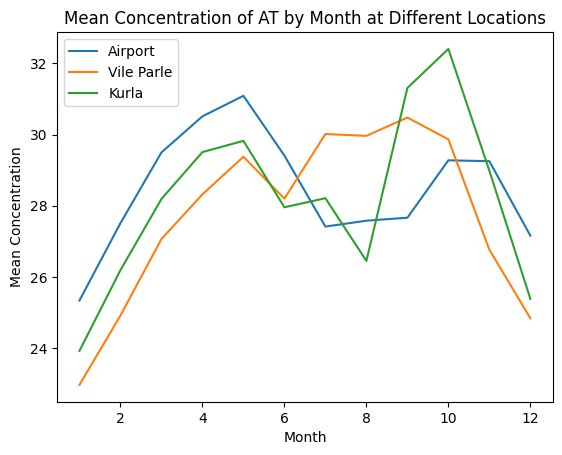

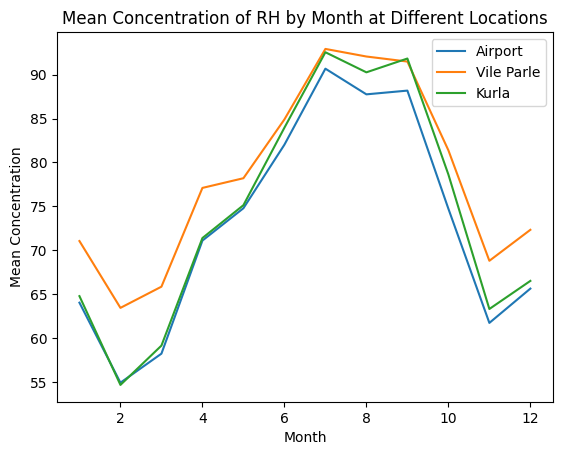

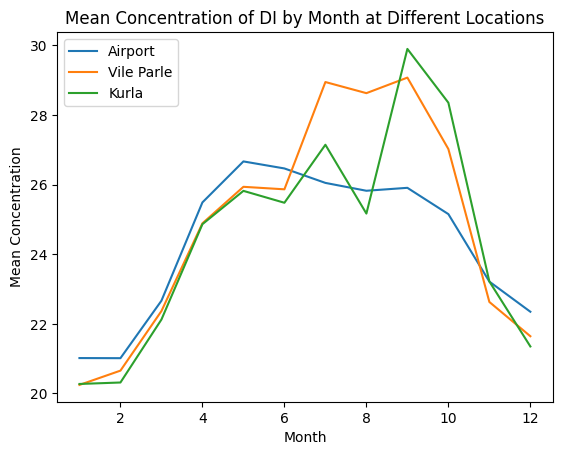

In [72]:
# Select a single pollutant
pollutants = ['AT','RH','THI']
new = ['AT','RH','DI']
# pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'Ozone', 'CO']
for f,pollutant in zip(new,pollutants):
    # Extract the month and concentration for the selected pollutant and locations
    df_airport_pollutant = airport_data.loc[:, ['From Date', pollutant]]
    df_airport_pollutant['month'] = df_airport_pollutant['From Date'].dt.month
    monthly_mean_airport = df_airport_pollutant.groupby('month')[pollutant].mean()

    df_chakala_pollutant = chakala_data.loc[:, ['From Date', pollutant]]
    df_chakala_pollutant['month'] = df_chakala_pollutant['From Date'].dt.month
    monthly_mean_chakala = df_chakala_pollutant.groupby('month')[pollutant].mean()

    df_kurla_pollutant = kurla_data.loc[:, ['From Date', pollutant]]
    df_kurla_pollutant['month'] = df_kurla_pollutant['From Date'].dt.month
    monthly_mean_kurla = df_kurla_pollutant.groupby('month')[pollutant].mean()

    # Plot the mean concentration by month for all three locations
    plt.plot(monthly_mean_airport, label='Airport')
    plt.plot(monthly_mean_chakala, label='Vile Parle')
    plt.plot(monthly_mean_kurla, label='Kurla')
    plt.xlabel('Month')
    plt.ylabel('Mean Concentration')
    plt.title('Mean Concentration of {} by Month at Different Locations'.format(f))
    plt.legend()
    plt.show()